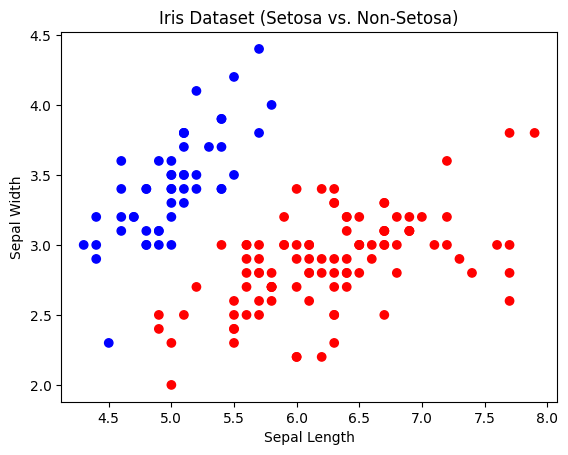

In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data[:, :2]
y = data.target
y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')
plt.show()


In [6]:
class SVMClassifier:
    def __init__(self, learning_rate = 0.1, lambda_param = 0.5, iters = 100):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iters = iters
        self.W = None
        self.B = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <=0, -1, 1)
        
        self.W = np.zeros(n_features)
        self.B = 0
        
        for _ in range(self.iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.W) - self.B) >= 1
                if condition:
                    self.W -= self.lr * (2 * self.lambda_param * self.W)
                else:
                    self.W -= self.lr * (2 * self.lambda_param * self.W - np.dot(x_i, y_[idx]))
                    self.B -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.W) - self.B
        return np.sign(approx)
            
            
        
        

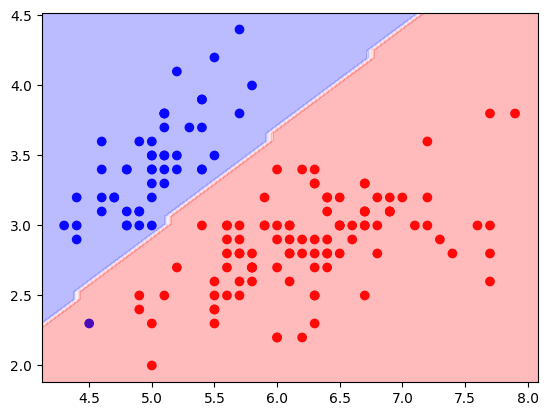

In [9]:
svm = SVMClassifier(0.001, 0.01, 1000)
svm.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()
    
plot_decision_boundary(X, y, svm)
